In [1]:
import pandas as pd
df = pd.read_excel('crop yield data sheet.xlsx')

In [2]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [3]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


# Handling the missing values

In [5]:
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [6]:
missing_yield_rows = df[df['Yeild (Q/acre)'].isnull()]
missing_yield_rows

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,:,NaN,NaN,NaN,NaN


In [7]:
df['Yeild (Q/acre)'].isnull().sum()

10

In [8]:
df.shape

(109, 7)

In [9]:
# dropping the missing values in the dependent feature
df = df.dropna(subset=['Yeild (Q/acre)'])

In [10]:
df['Yeild (Q/acre)'].isnull().sum()

0

In [11]:
df.isna().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [12]:
df.shape

(99, 7)

In [13]:
df.corr()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.000000,0.890318,-0.967291,0.875808,0.776814,0.810893,0.886721
Fertilizer,0.890318,1.000000,-0.864742,0.909786,0.816710,0.762152,0.833823
Temperatue,-0.967291,-0.864742,1.000000,-0.846513,-0.780556,-0.779570,-0.892425
Nitrogen (N),0.875808,0.909786,-0.846513,1.000000,0.778651,0.808640,0.879056
Phosphorus (P),0.776814,0.816710,-0.780556,0.778651,1.000000,0.748642,0.800094
Potassium (K),0.810893,0.762152,-0.779570,0.808640,0.748642,1.000000,0.856010
Yeild (Q/acre),0.886721,0.833823,-0.892425,0.879056,0.800094,0.856010,1.000000


In [14]:
import pandas as pd

# Assuming df is your dataframe and 'Yield (Q/acre)' is the target variable
correlation_matrix = df.corr()
print(correlation_matrix['Yeild (Q/acre)'].sort_values(ascending=False))


Yeild (Q/acre)    1.000000
Rain Fall (mm)    0.886721
Nitrogen (N)      0.879056
Potassium (K)     0.856010
Fertilizer        0.833823
Phosphorus (P)    0.800094
Temperatue       -0.892425
Name: Yeild (Q/acre), dtype: float64


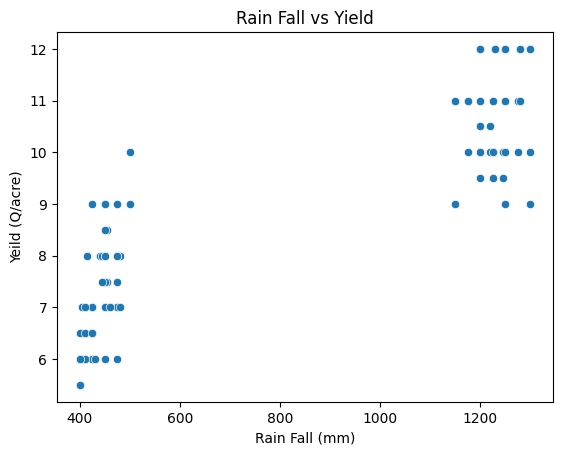

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Rain Fall (mm)', y='Yeild (Q/acre)', data=df)
plt.title('Rain Fall vs Yield')
plt.show()


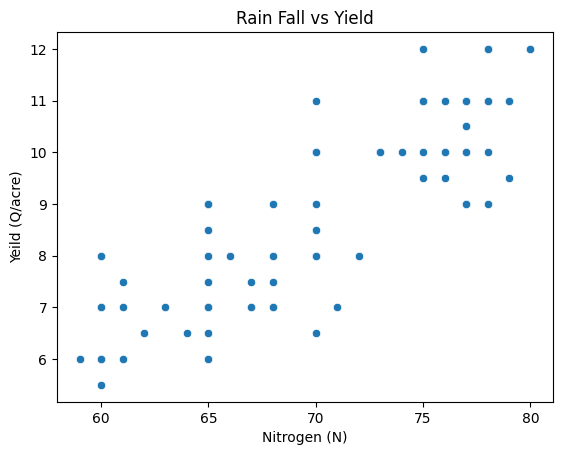

In [16]:
sns.scatterplot(x='Nitrogen (N)', y='Yeild (Q/acre)', data=df)
plt.title('Rain Fall vs Yield')
plt.show()


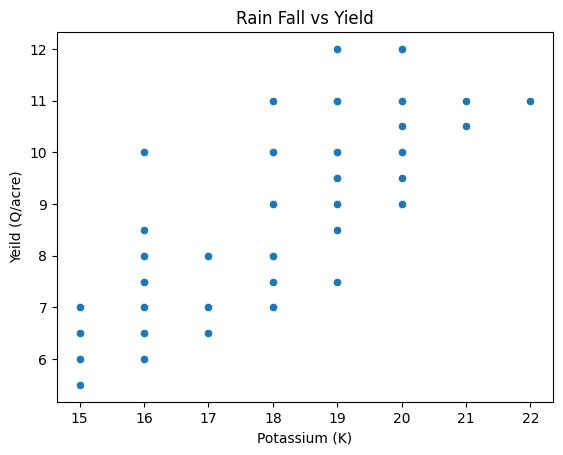

In [17]:
sns.scatterplot(x='Potassium (K)', y='Yeild (Q/acre)', data=df)
plt.title('Rain Fall vs Yield')
plt.show()


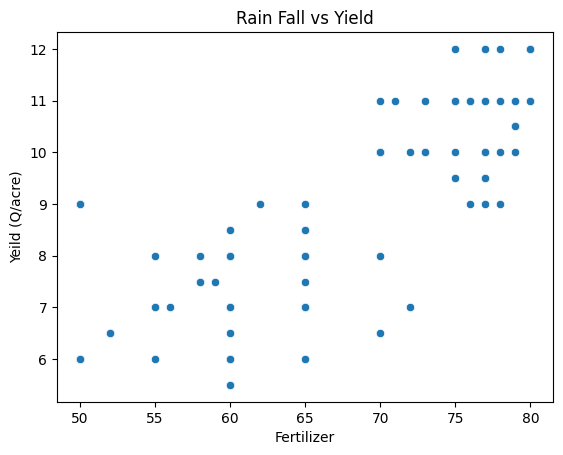

In [18]:
sns.scatterplot(x='Fertilizer', y='Yeild (Q/acre)', data=df)
plt.title('Rain Fall vs Yield')
plt.show()


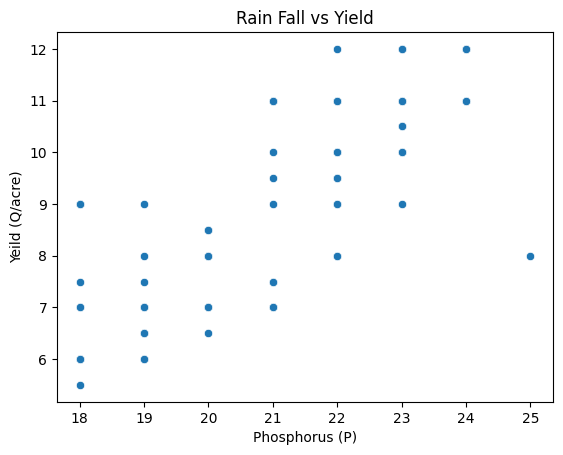

In [19]:
sns.scatterplot(x='Phosphorus (P)', y='Yeild (Q/acre)', data=df)
plt.title('Rain Fall vs Yield')
plt.show()


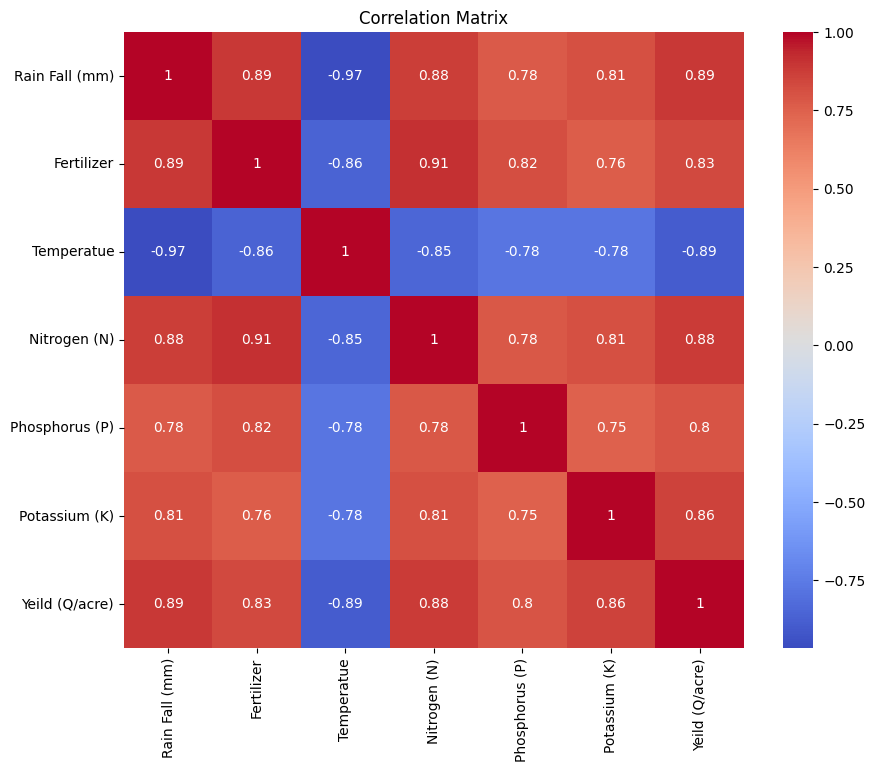

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization

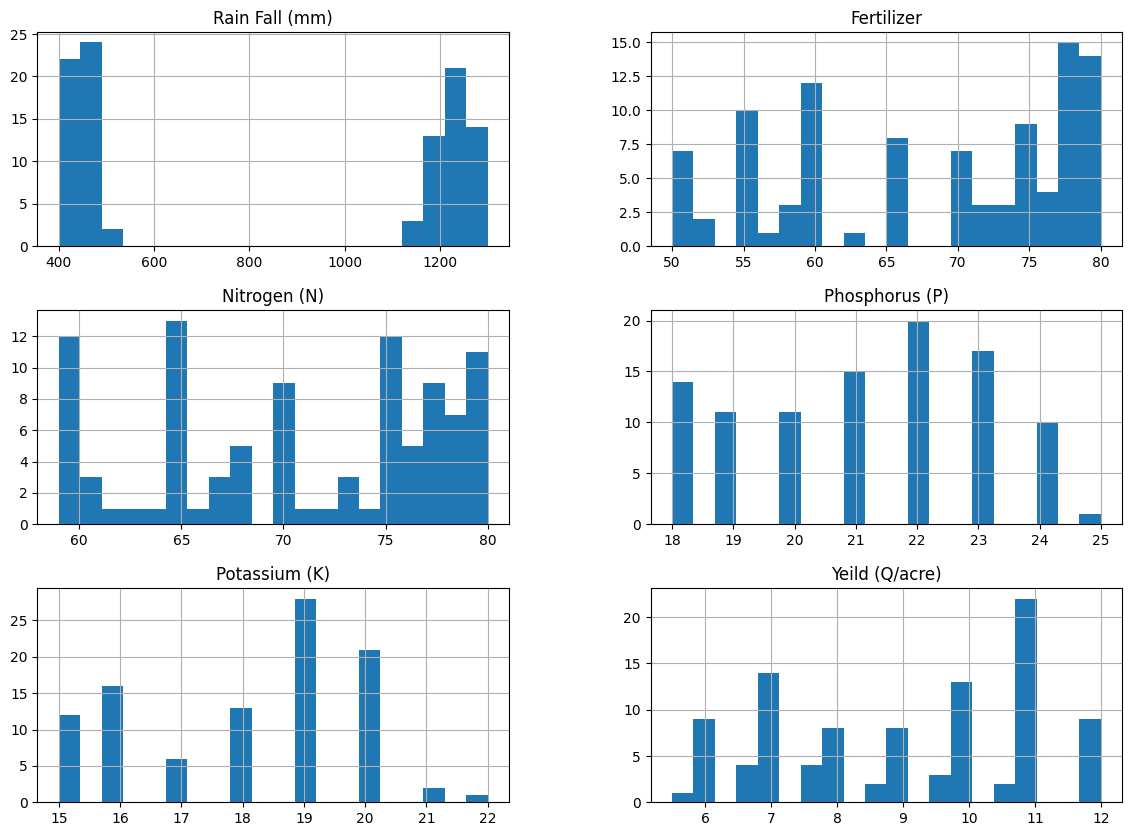

In [17]:
import matplotlib.pyplot as plt
# Histograms for numerical features
df.hist(bins=20, figsize=(14, 10))
plt.show()

In [25]:
from scipy.stats import boxcox
df['Yeild (Q/acre)'], _ = boxcox(df['Yeild (Q/acre)'] + 1)  # +1 to avoid issues with 0 values


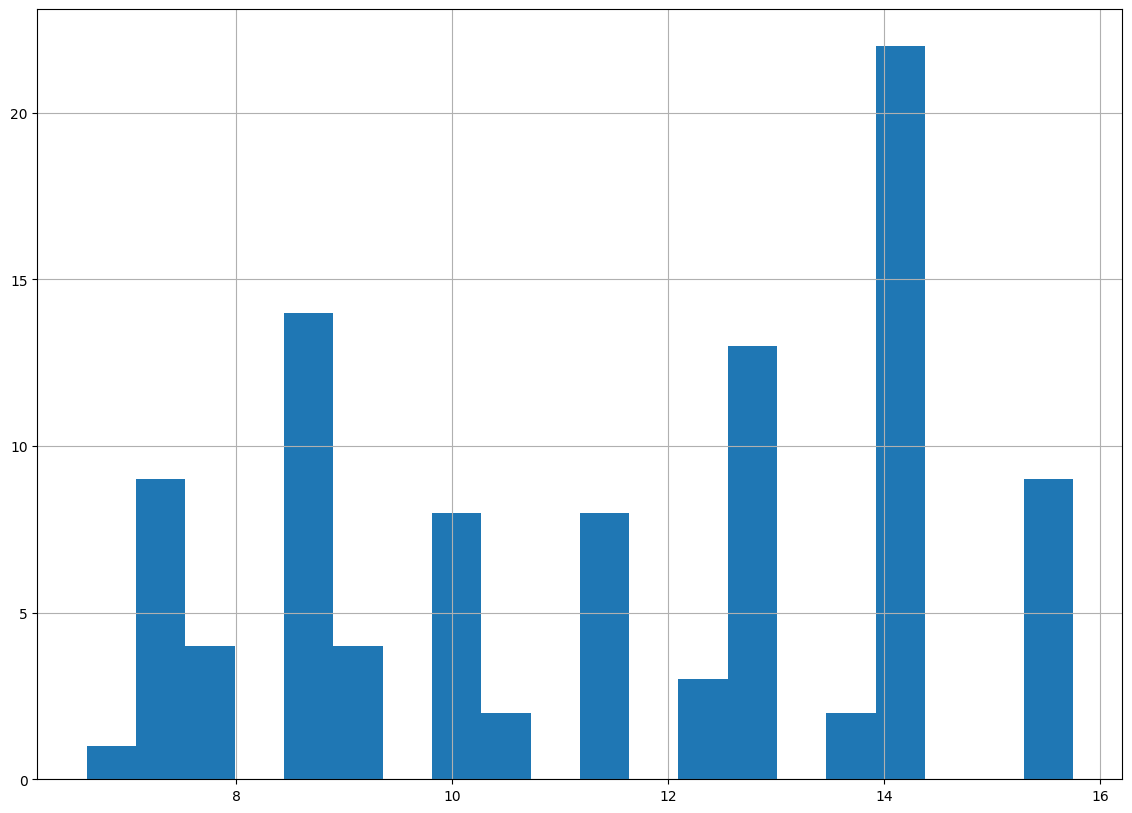

In [26]:
df['Yeild (Q/acre)'].hist(bins=20, figsize=(14, 10))
plt.show()

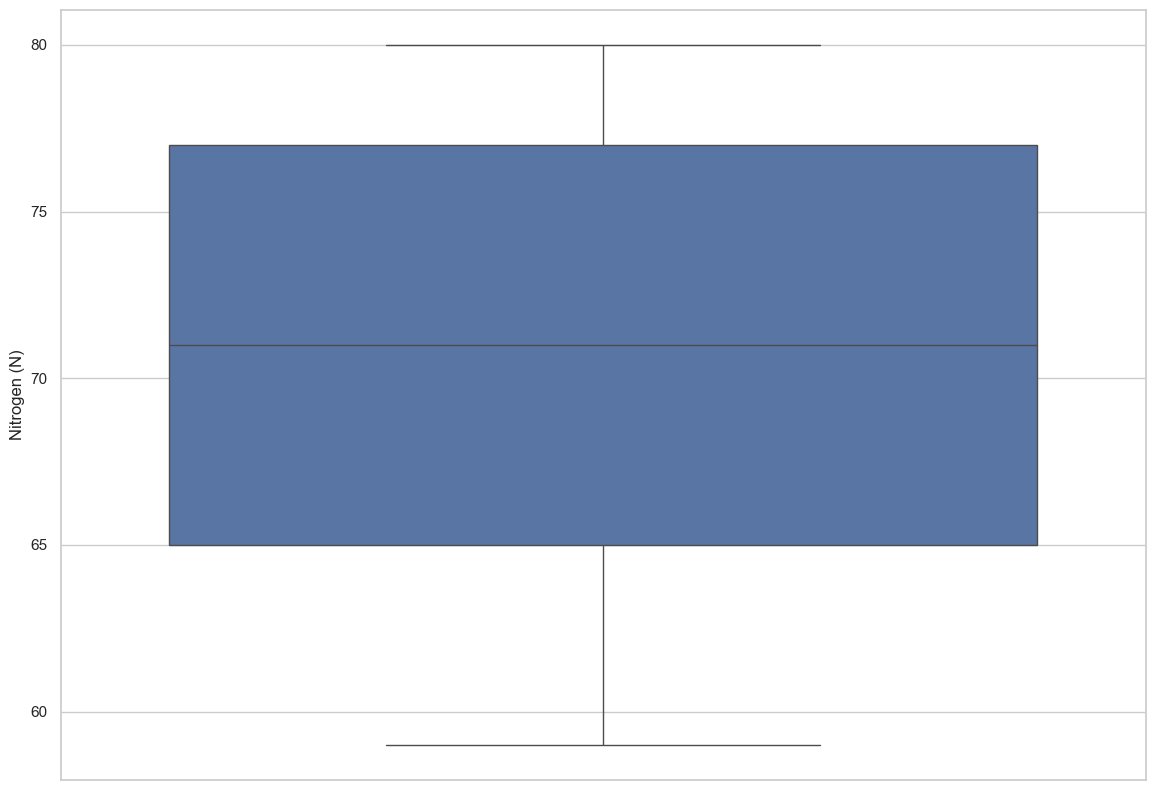

In [21]:
import seaborn as sns
sns.set(style="whitegrid")
# Box plots for numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=df['Nitrogen (N)'])
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [22]:
df['Rainfall_Fertilizer'] = df['Rain Fall (mm)'] * df['Fertilizer']
df['Temperature_Nitrogen'] = df['Temperatue'] * df['Nitrogen (N)']


# Log Transformation

In [23]:
import numpy as np
df['log_Rain_Fall'] = np.log(df['Rain Fall (mm)'] + 1)


In [24]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre),Rainfall_Fertilizer,Temperature_Nitrogen,log_Rain_Fall
0,1230.0,80.0,28,80.0,24.0,20.0,12.0,98400.0,2240.0,7.115582
1,480.0,60.0,36,70.0,20.0,18.0,8.0,28800.0,2520.0,6.175867
2,1250.0,75.0,29,78.0,22.0,19.0,11.0,93750.0,2262.0,7.131699
3,450.0,65.0,35,70.0,19.0,18.0,9.0,29250.0,2450.0,6.111467
4,1200.0,80.0,27,79.0,22.0,19.0,11.0,96000.0,2133.0,7.090910


# Dependent and independent variables

In [25]:
X = df.drop('Yeild (Q/acre)', axis=1)
X

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Rainfall_Fertilizer,Temperature_Nitrogen,log_Rain_Fall
0,1230.0,80.0,28,80.0,24.0,20.0,98400.0,2240.0,7.115582
1,480.0,60.0,36,70.0,20.0,18.0,28800.0,2520.0,6.175867
2,1250.0,75.0,29,78.0,22.0,19.0,93750.0,2262.0,7.131699
3,450.0,65.0,35,70.0,19.0,18.0,29250.0,2450.0,6.111467
4,1200.0,80.0,27,79.0,22.0,19.0,96000.0,2133.0,7.090910
...,...,...,...,...,...,...,...,...,...
94,1250.0,77.0,28,78.0,23.0,20.0,96250.0,2184.0,7.131699
95,425.0,60.0,39,65.0,19.0,17.0,25500.0,2535.0,6.054439
96,1220.0,79.0,28,77.0,23.0,21.0,96380.0,2156.0,7.107425
97,480.0,65.0,36,68.0,21.0,16.0,31200.0,2448.0,6.175867


In [26]:
y = df['Yeild (Q/acre)']
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

# Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
num_features = X.select_dtypes(exclude="object").columns
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X.shape

(99, 7)

In [30]:
y.shape

(99,)

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((79, 7), (20, 7))

# Model Selection and Training

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Create an Evaluate Function to give all metrics after model Training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.6956
- Mean Absolute Error: 0.5714
- R2 Score: 0.8626
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7042
- Mean Absolute Error: 0.5527
- R2 Score: 0.8941


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.3092
- Mean Absolute Error: 1.1071
- R2 Score: 0.5133
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.6158
- Mean Absolute Error: 1.5367
- R2 Score: 0.4424


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7122
- Mean Absolute Error: 0.5748
- R2 Score: 0.8560
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6900
- Mean Absolute Error: 0.5560
- R2 Score: 0.8983


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6663
- Mean Absolute Error: 0.5278
- R2 Score: 0.8739
-----------------------

# Results

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.915525
2,Ridge,0.898312
0,Linear Regression,0.894090
5,Random Forest Regressor,0.871759
7,AdaBoost Regressor,0.853253
6,XGBRegressor,0.849365
4,Decision Tree,0.813109
1,Lasso,0.442359


# Ridge

In [39]:
reg_model = Ridge(fit_intercept=True)
reg_model = reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.83


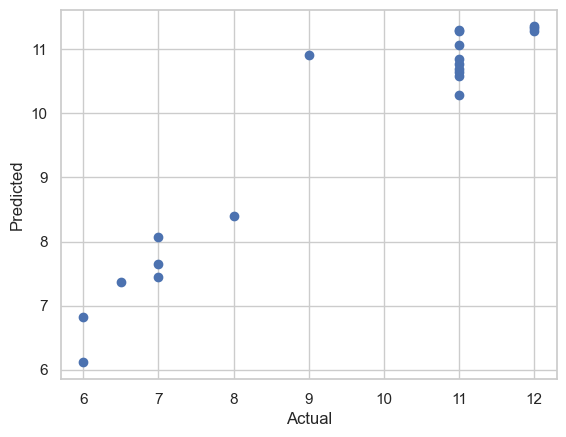

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

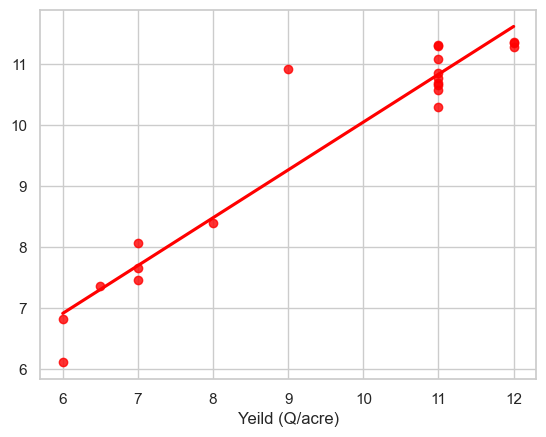

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
62,11.0,10.847913,0.152087
40,11.0,11.284703,-0.284703
95,6.5,7.359841,-0.859841
18,11.0,10.771989,0.228011
97,7.0,7.655466,-0.655466
84,9.0,10.911556,-1.911556
64,11.0,10.290537,0.709463
42,11.0,11.303982,-0.303982
10,12.0,11.337452,0.662548
0,12.0,11.281338,0.718662
